In [0]:
!git clone https://github.com/brendenlake/omniglot.git
!unzip omniglot/python/images_background.zip 

In [5]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import os.path

from PIL import Image
from tensorflow.python import keras
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt


train_x = np.zeros((19280,105,105))
print(train_x.shape)
train_y = np.zeros((19280))

print(train_x.shape)

i=0
arc = os.path.join("images_background")
for alphabet in os.listdir(arc):
    for characters in os.listdir(os.path.join(arc,alphabet)):
        for sub in os.listdir(os.path.join(arc,alphabet,characters)):
            path = os.path.join(arc,alphabet,characters,sub)
            img = Image.open(path)
            train_x[i,:,:] = np.asarray(img.getdata()).reshape(img.size)
            train_y[i] = int(path[path.find('.png')-7:path.find('.png')-3])
            #print(train_y[i])
            i += 1  
            


(19280, 105, 105)
(19280, 105, 105)


In [6]:
train_x = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
train_y = tf.keras.utils.to_categorical(train_y)         
print(train_y.shape)
print(train_x.shape)

(19280, 965)
(19280, 105, 105, 1)


In [7]:
plt.figure(100)
class_num = 679
#plt.imshow(train_x[np.where(train_y==class_num)][0:10].reshape(105*10,105))

plt.figure(101)
#plt.imshow(train_x[np.where(train_y==class_num)][10:20].reshape(10*105,105))
print(path)
print(int(path[path.find('.png')-7:path.find('.png')-3]))


images_background/Malay_(Jawi_-_Arabic)/character22/0577_02.png
577


In [32]:
convnet = tf.keras.Sequential()
model = tf.keras.Sequential()

#convolution layer 1
convnet.add(tf.keras.layers.Conv2D(filters=64,kernel_size=2,padding='same',
                                 activation='relu',input_shape=(105,105,1)))
convnet.add(tf.keras.layers.MaxPooling2D(pool_size=(2)))
convnet.add(tf.keras.layers.Dropout(0.3))

#convolution layer 2
convnet.add(tf.keras.layers.Conv2D(filters=32,kernel_size=2,padding='same',
                                 activation='relu',))
convnet.add(tf.keras.layers.MaxPooling2D(pool_size=(2)))
convnet.add(tf.keras.layers.Dropout(0.2))

convnet.trainable = False
#dense
model.add(convnet)

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(256,activation='sigmoid'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(256,activation='softmax'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(train_y.shape[1],activation='sigmoid'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer ='adam')

#conv = model.predict(train_x[0].reshape(1,105,105,1))#model.predict(train_x[0].reshape(1,105,105,1))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_10 (Sequential)   (None, 26, 26, 32)        8544      
_________________________________________________________________
flatten_5 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               5538048   
_________________________________________________________________
dropout_27 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_28 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               65792     
__________

In [17]:
from google.colab import files
conv_saved = files.upload()
!ls

conv.weights.last (1).hdf5  images_background  sample_data
conv.weights.last.hdf5	    omniglot


In [0]:
convnet.load_weights("conv.weights.last.hdf5")


In [28]:
model.fit(train_x,train_y,validation_split=0.2,batch_size=128,epochs=1)

Train on 15424 samples, validate on 3856 samples
Epoch 1/1
15424/15424 [==============================] - 20s 1ms/step - loss: 6.8605 - val_loss: 7.0065


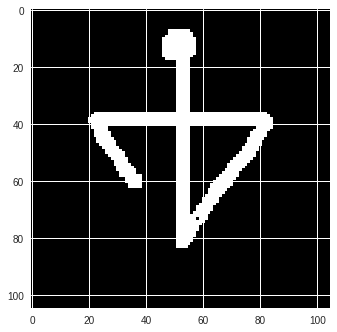

In [35]:
plt.imshow(train_x[10900,:,:,:].reshape(train_x.shape[1],train_x.shape[2]))

(26, 26)


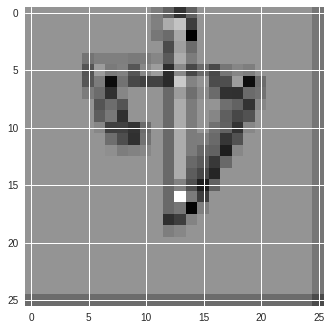

In [50]:
a =convnet.predict(train_x[10901,:,:,:].reshape(1,105,105,1))
print(s.shape)
a = a[:,:,:,:].sum(keepdims= True,axis = 3).reshape(26,26)
plt.imshow(a)

(1, 26, 26, 32)


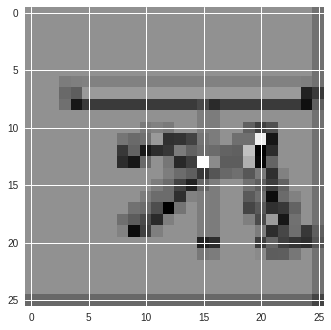

In [48]:
s =convnet.predict(train_x[12900,:,:,:].reshape(1,105,105,1))
print(s.shape)
s = s[:,:,:,:].sum(keepdims= True,axis = 3).reshape(26,26)
plt.imshow(s)

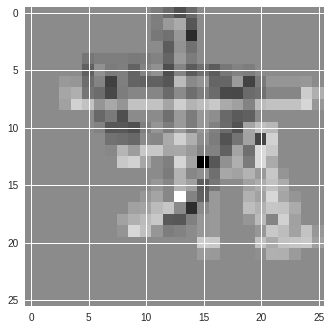

In [52]:
plt.imshow(a-s)